Mass ratio for  V1481.tbl  is ??
Periodogram peaks above a power of 0.25: [ 0.80922897  1.28770729  4.27819678  4.43768955  4.47756274]


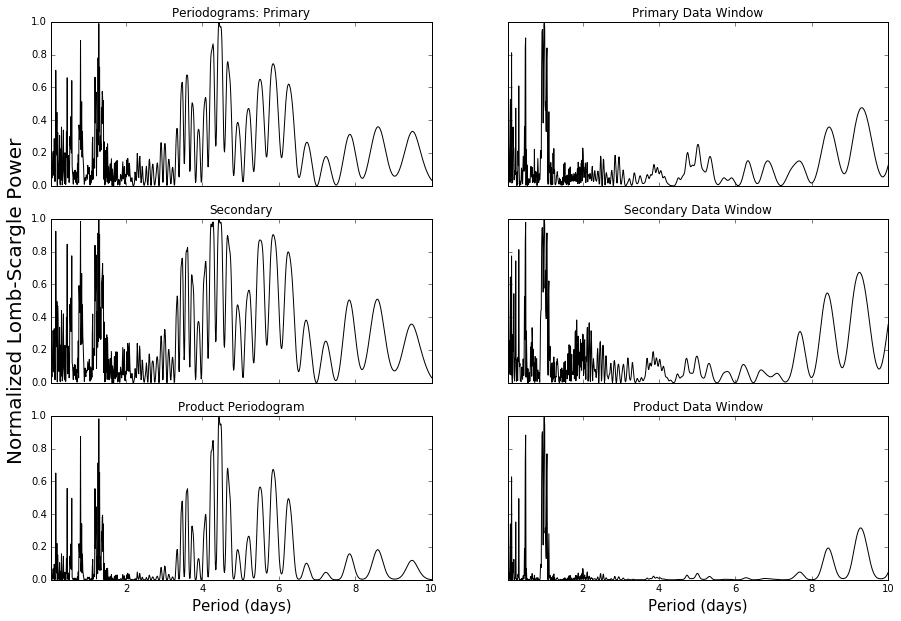

In [2]:
#import-libraries-and-data---------------------------------------------------------------------------------------#
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import lombscargle
from scipy import stats
import functions as f
%matplotlib inline
filename     = 'V1481.tbl'
system       = np.genfromtxt(filename, skip_header=1, usecols=(0, 1, 2), max_rows=11)

#use only first 11 data points to use ESO data, last 5 for APOGEE data

#define-variables------------------------------------------------------------------------------------------------#

JD, RVp, RVs = [datum[0] for datum in system], [datum[1] for datum in system], [datum[2] for datum in system]
JDp, JDs     = JD, JD
samples      = 1000
max_period   = 10

#define-function-------------------------------------------------------------------------------------------------#

periodogram = f.periodogram
dataWindow  = f.dataWindow
maxima      = f.maxima
phases      = f.phases
massRatio   = f.massRatio
adjustment  = f.adjustment
RV          = f.RV

#now-do-things!--------------------------------------------------------------------------------------------------#

#check RV measurements for the need to be adjusted and adjust them if so
for i in range(0, len(JD)-1):
    if np.isnan(system[i][1]):
        JDp, RVp = adjustment(JD, RVp)
        break
        
for i in range(0, len(JD)-1):
    if np.isnan(system[i][2]):
        JDs, RVs = adjustment(JD, RVs)
        break
        
# plot the results
x, y  = periodogram(JDp, RVp, samples, max_period)
y2    = periodogram(JDs, RVs, samples, max_period)[1]
y3,y4 = dataWindow(JDp, samples, max_period)[1], dataWindow(JDs, samples, max_period)[1]

fig, ((ax1,ax4),(ax2,ax5),(ax3,ax6)) = plt.subplots(3, 2, sharex='col', sharey='row')
ax1.plot(x, y, 'k')
ax1.set_title('Periodograms: Primary')
ax1.set_xlim(1/24, max_period)
ax4.set_xlim(1/24, max_period)
ax2.plot(x, y2, 'k')
ax2.set_title('Secondary')
ax3.plot(x, y*y2, 'k')
ax3.set_title('Product Periodogram')
ax4.plot(x, y3, 'k')
ax4.set_title('Primary Data Window')
ax5.plot(x, y4, 'k')
ax5.set_title('Secondary Data Window')
ax6.plot(x, y3*y4, 'k')
ax6.set_title('Product Data Window')
ax3.set_xlabel('Period (days)', size='15')
ax6.set_xlabel('Period (days)', size='15')
ax2.set_ylabel('Normalized Lomb-Scargle Power', size='20')
fig.set_figheight(10)
fig.set_figwidth(15)
#plt.savefig(filename + ' periodogram.pdf')
print('Mass ratio for ', filename, ' is ??')
print('Periodogram peaks above a power of 0.25:',maxima(0.8, x, y, y2))

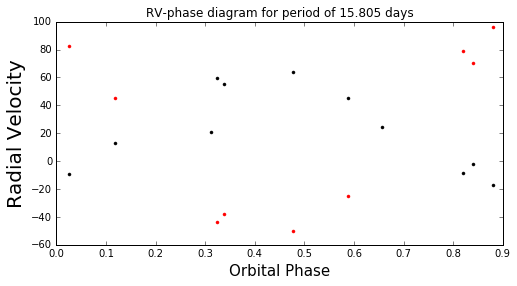

In [3]:
fig, ((ax1)) = plt.subplots(1,1, sharex='col', sharey='row')
ax1.plot(phases(maxima(0.3, x, y, y2)[3], 0, JDp), RVp, 'k.')
ax1.plot(phases(maxima(0.3, x, y, y2)[3], 0, JDs), RVs, 'r.')
ax1.set_title('RV-phase diagram for period of 15.805 days')
ax1.set_xlabel('Orbital Phase', size='15')
ax1.set_ylabel('Radial Velocity', size='20')
#fig.set_figheight(12)
fig.set_figwidth(8)
#plt.savefig(filename + ' RV-phase diagram.pdf')

mass ratio is  0.540616744556 +/- 5.79385526638e-05


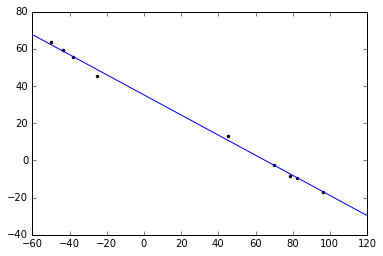

In [4]:
mass_ratio, intercept, r_squared, standard_error, slope_error = massRatio(RVs,RVp, system)
p = [datum[1] for datum in system if not np.isnan(datum[1]+datum[2])]
s = [datum[2] for datum in system if not np.isnan(datum[1]+datum[2])]
plt.plot(s, p, 'k.')
plt.plot(np.array([-60, 120]), -mass_ratio*np.array([-60, 120])+intercept)
print('mass ratio is ', mass_ratio, "+/-", slope_error)

(2453657, 2453756)

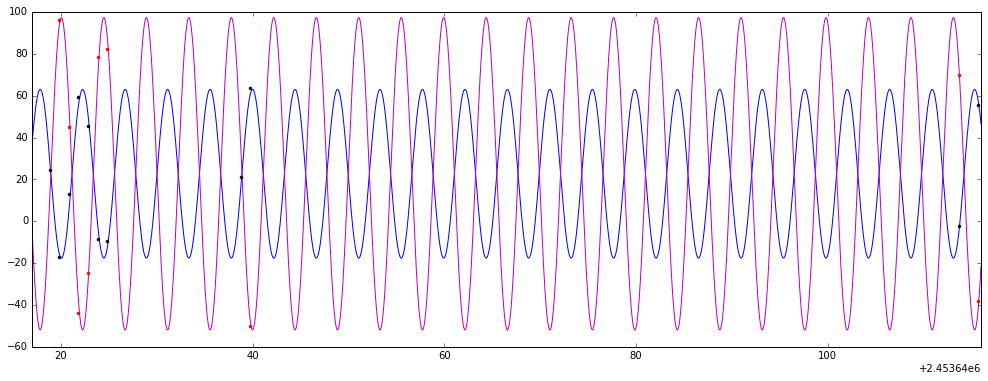

In [6]:
Period = 4.433 #period in days determined first via periodogram
mass_ratio = 0.54

T = 30 #Time offset in days, boils down to a horizontal shift in RV. T is the 'zero' point
e = 0 #eccentricity (unitless)
w = 0 #longitude of periastron in radians
y = 22.7 #systemic velocity in km/s
x = np.linspace(2453640, 2456700, num = 100000) #provides independent variable values

#these parameters are star specific
K = -40.3 #semamplitude in km/s

parameters = K, e, w, T, Period, y

primary, secondary = RV(x, mass_ratio, parameters)
plt.figure(figsize=(17,6))
plt.plot(x, primary)
plt.plot(x, secondary, 'm')

plt.plot(JDp, RVp, 'k.')
plt.plot(JDs, RVs, 'r.')
plt.xlim(2453657, 2453756) #uncomment for veiw of ESO points
#plt.xlim(2456606, 2456637) #uncomment for view of APOGEE points